Course: IITK AIML - Core : Deep Learning with Keras and TensorFlow
# Project : Home Loan Data Analysis

Importing libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve
from imblearn.over_sampling import SMOTE

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns',None)

Importing dataset

In [3]:
df = pd.read_csv("D:/Work/IITK_AI_ML/Course_5/House_Loan_Data_Analysis_dataset/loan_data.csv")

In [4]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Data Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
df.shape

(307511, 122)

In [7]:
print(df.isnull().sum())

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

Few columns have null values in it. 

Handling missing values

In [8]:
imputer = SimpleImputer(strategy='median')
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])


In [9]:
# Percentage of default (TARGET column)
default_percentage = df['TARGET'].value_counts(normalize=True) * 100
print("\nPercentage of default:")
print(default_percentage)


Percentage of default:
TARGET
0.0    91.927118
1.0     8.072882
Name: proportion, dtype: float64


Target column contains binary values 0 and 1. 0 for 'payer' and 1 for 'default'.

In [10]:
# Handle imbalanced dataset using SMOTE
X = df.drop(columns=['TARGET'])
y = df['TARGET']

In [11]:
# Encode categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    X[col] = LabelEncoder().fit_transform(X[col])

In [12]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [14]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [16]:
# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Build deep learning model
def build_model(input_shape):
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(input_shape,)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(32, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.1),
        layers.Dense(1, activation='sigmoid')
    ])
    return model


In [18]:
model = build_model(X_train.shape[1])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


c:\Users\darji\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# Train the model with early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, callbacks=[early_stopping])

Epoch 1/50
14135/14135 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.8608 - loss: 0.3210 - val_accuracy: 0.8908 - val_loss: 0.3188
Epoch 2/50
14135/14135 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.8646 - loss: 0.3138 - val_accuracy: 0.8938 - val_loss: 0.3120
Epoch 3/50
14135/14135 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.8683 - loss: 0.3071 - val_accuracy: 0.8963 - val_loss: 0.3070
Epoch 4/50
14135/14135 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.8707 - loss: 0.3020 - val_accuracy: 0.8888 - val_loss: 0.3095
Epoch 5/50
14135/14135 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.8731 - loss: 0.2979 - val_accuracy: 0.1313 - val_loss: 1.2456
Epoch 6/50
14135/14135 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.8753 - loss: 0.2948 - val_accuracy: 0.9030 - val_loss: 0.3011
Epoch 7/50
14135/14135 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.8769 - loss: 0.2921 - val_accuracy: 0.9042 - val_loss: 0.2938
Epoch 8/50
14135/14135 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 

In [22]:
# Evaluate model
y_pred_prob = model.predict(X_test)

1922/1922 ━━━━━━━━━━━━━━━━━━━━ 1s 484us/step


In [27]:
# Find optimal classification threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
optimal_idx = np.argmax(precision[:-1] + recall[:-1])
optimal_threshold = thresholds[optimal_idx] if optimal_idx < len(thresholds) else 0.5

In [28]:
# Apply the optimal threshold
y_pred = (y_pred_prob > optimal_threshold).astype(int)


In [29]:
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.00      0.00     56538
         1.0       0.08      1.00      0.15      4965

    accuracy                           0.08     61503
   macro avg       0.52      0.50      0.08     61503
weighted avg       0.89      0.08      0.01     61503



In [30]:
# Sensitivity (Recall for positive class)
cm = confusion_matrix(y_test, y_pred)
sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1]) if (cm[1, 0] + cm[1, 1]) > 0 else 0
print(f"Sensitivity: {sensitivity:.2f}")

Sensitivity: 1.00


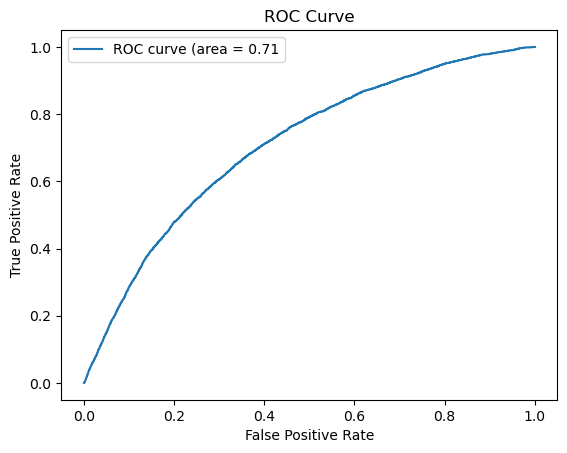

In [31]:
# ROC Curve & AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f}')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [32]:
print(f"AUC Score: {roc_auc:.2f}")

AUC Score: 0.71


### Justification for problem statement:

1. High sensitivity (1.00) shows that the model successfully captures all defaulters, which is critical in the finance domain to avoid issuing risky loans.
2. AUC score of 0.71 suggests there is still room for improvment in distingushing between risky and safe applicants. 
3. Problem statment of predicting an applicant is default or not is justified but model neeeds furthuer optimization. 

In [34]:
# Build improved deep learning model
def build_model(input_shape):
    model = keras.Sequential([
        layers.Dense(256, activation='relu', input_shape=(input_shape,)),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(32, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.1),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

In [35]:
model = build_model(X_train.shape[1])
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

c:\Users\darji\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
# Train the model with early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, callbacks=[early_stopping])

# Evaluate model
y_pred_prob = model.predict(X_test)

# Find optimal classification threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
optimal_idx = np.argmax(2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1] + 1e-10))  # F1-score optimization
optimal_threshold = thresholds[optimal_idx] if optimal_idx < len(thresholds) else 0.5

Epoch 1/100
7068/7068 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.7749 - loss: 0.4722 - val_accuracy: 0.8305 - val_loss: 0.3994
Epoch 2/100
7068/7068 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8399 - loss: 0.3576 - val_accuracy: 0.8686 - val_loss: 0.3452
Epoch 3/100
7068/7068 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8558 - loss: 0.3281 - val_accuracy: 0.8716 - val_loss: 0.3400
Epoch 4/100
7068/7068 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8646 - loss: 0.3110 - val_accuracy: 0.8869 - val_loss: 0.3243
Epoch 5/100
7068/7068 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8713 - loss: 0.2997 - val_accuracy: 0.8968 - val_loss: 0.3069
Epoch 6/100
7068/7068 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8742 - loss: 0.2928 - val_accuracy: 0.8431 - val_loss: 0.3885
Epoch 7/100
7068/7068 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8786 - loss: 0.2864 - val_accuracy: 0.8200 - val_loss: 0.4192
Epoch 8/100
7068/7068 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8813 -

In [37]:
# Apply the optimal threshold
y_pred = (y_pred_prob > optimal_threshold).astype(int)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.81      0.87     56538
         1.0       0.18      0.48      0.26      4965

    accuracy                           0.78     61503
   macro avg       0.56      0.64      0.57     61503
weighted avg       0.88      0.78      0.82     61503



In [38]:

# Sensitivity (Recall for positive class)
cm = confusion_matrix(y_test, y_pred)
sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1]) if (cm[1, 0] + cm[1, 1]) > 0 else 0
print(f"Sensitivity: {sensitivity:.2f}")


Sensitivity: 0.48


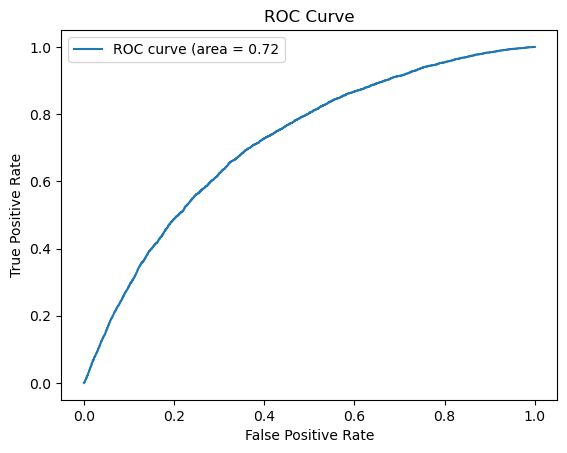

AUC Score: 0.72


In [39]:
# ROC Curve & AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f}')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print(f"AUC Score: {roc_auc:.2f}")

## *Justification* ##

1. Sensitivity of 0.48 means model correctly identifies only 48% of actual defaulters. Since this is a high-stakes problem where missing a defaulter can lean to financial loss, sensitivity needs improvement. 
2. AUC score of 0.72 means model performs 72% better than random guessing in distinguishing between defaulters and non-defaulters. 